In [1]:
from denn.utils import Discriminator, Generator
from denn.sho.gan_sho import train_GAN_SHO_semisupervised
import torch.nn as nn

# Semisupervised GAN

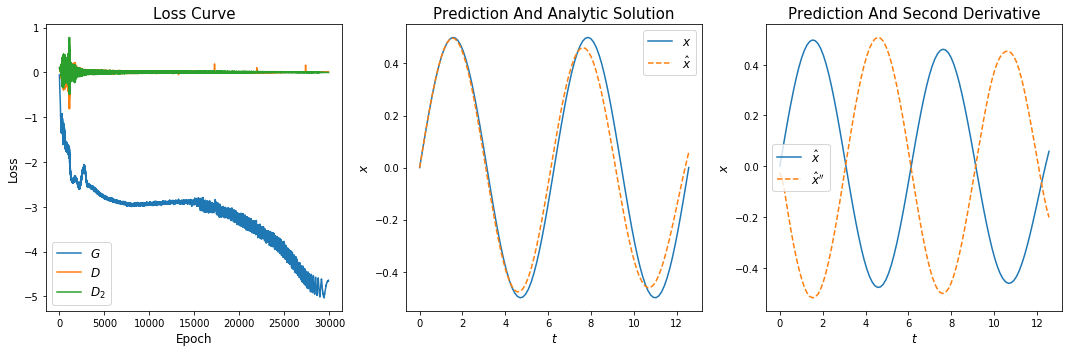

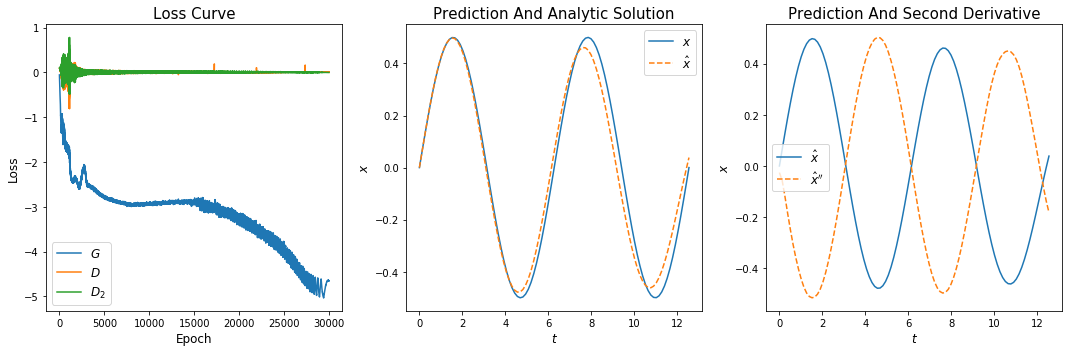

Final MSE: 0.0032014427706599236


In [2]:
G = Generator(in_dim=1, out_dim=1,
              n_hidden_units=32,
              n_hidden_layers=3,
              activation=nn.Tanh(), 
              output_tan=False,
              residual=False)

D = Discriminator(in_dim=2, out_dim=1,
                  n_hidden_units=32,
                  n_hidden_layers=3,
                  activation=nn.Tanh(),
                  unbounded=True,
                  residual=False)

D2 = Discriminator(in_dim=2, out_dim=1,
                  n_hidden_units=32,
                  n_hidden_layers=3,
                  activation=nn.Tanh(),
                  unbounded=True,
                  residual=False)

res = train_GAN_SHO_semisupervised(G, D, D2, d_lr=2e-4, final_plot=True, num_epochs=30000, realtime_plot=True, check_every=100, system_of_ODE=False)

# Semisupervised GAN (1 D, 1 MSE)

**This is on the master branch currently**

TODO: integrate this method back in?

# Semisupervised MSE

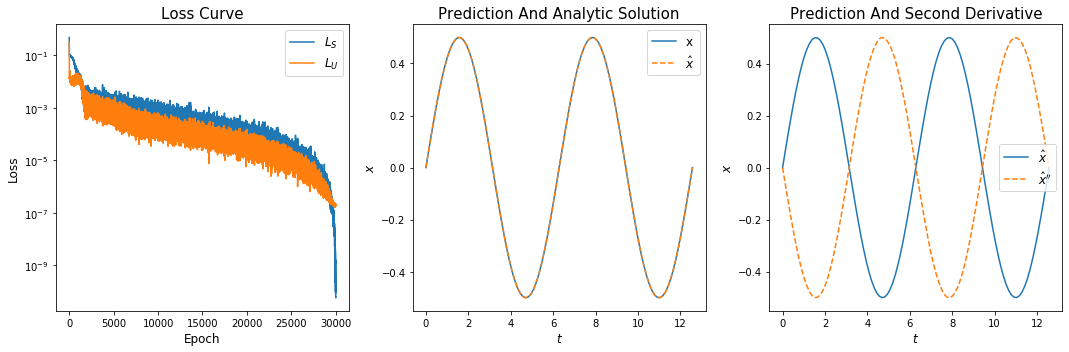

Final MSE 5.511994333184944e-11


In [3]:
from denn.utils import Discriminator, Generator
from denn.sho.mse_sho import train_MSE
import torch.nn as nn

msenet = Generator(in_dim=1, out_dim=1,
    n_hidden_units=32,
    n_hidden_layers=3,
    activation=nn.Tanh(), 
    output_tan=False,
    residual=False)

res = train_MSE(msenet, method='semisupervised', niters=30000, make_plot=True, perturb=True)